# German Traffic Sign Recognition

<img src="https://st5.depositphotos.com/1029717/62152/i/450/depositphotos_621521180-stock-photo-parking-road-sign-street-sign.jpg">

Bu projemizde Almanyadaki trafik işaretlerini tanıyan bir model geliştireceğiz

<a href="https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?select=Test">Dataya Buradan Erisebilirsiniz</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [2]:
img_path="Train/"
# Train klasörünün içindeki klasör isimlerini alıp label attık
labels=[item for item in os.listdir(img_path) if os.path.isdir(os.path.join(img_path,item))]

In [3]:
#Dosyadan Resim okuma
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):          #Klasörün içindeki alt klasörleri söyler
        img_list.append(img_path+label+'/'+img_file)     # apppend dizinin sonuna eklme yapıyor
        label_list.append(label)

df=pd.DataFrame({"img": img_list,"label": label_list})  # Bunları bir dataframe e attık

In [4]:
df.sample(5)

,img,label
33891,Train/5/00005_00042_00022.png,5
32234,Train/41/00041_00003_00015.png,41
7948,Train/13/00013_00002_00028.png,13
13595,Train/18/00018_00021_00005.png,18
34863,Train/6/00006_00013_00004.png,6


In [5]:
df.label.value_counts()

label
2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
18    1200
35    1200
17    1110
14     780
31     780
33     689
15     630
26     600
28     540
23     510
30     450
16     420
6      420
34     420
36     390
22     390
20     360
40     360
21     330
39     300
29     270
24     270
41     240
42     240
32     240
27     240
37     210
19     210
0      210
Name: count, dtype: int64

In [6]:
image=cv2.imread(str(df["img"][1]))
image.shape

(30, 30, 3)

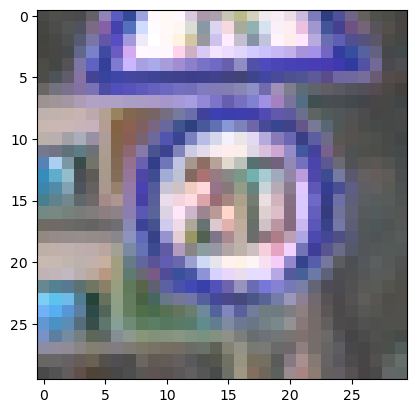

In [7]:
plt.imshow(image)

In [8]:
x=[]
for img in df["img"]:
    img=cv2.imread(img)
    img=cv2.resize(img,(30,30))  #Boyutunu 32*32 px yaptık
    img=img/255.0  #Normalize Ettik
    x.append(img)

In [9]:
x=np.array(x)

In [10]:
y=df["label"].astype(int)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model=Sequential()
model.add(Input(shape=(30,30,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) # Burada 'rate' parametresini belirtiyoruz
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(43, activation='softmax')) # 10 fakli cevap classification 0-9 a kadar olan rakamlar
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [13]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,verbose=1)

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6471 - loss: 1.3503 - val_accuracy: 0.9637 - val_loss: 0.1630
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9636 - loss: 0.1281 - val_accuracy: 0.9760 - val_loss: 0.0893
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9760 - loss: 0.0831 - val_accuracy: 0.9843 - val_loss: 0.0532
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9799 - loss: 0.0707 - val_accuracy: 0.9824 - val_loss: 0.0662
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9825 - loss: 0.0602 - val_accuracy: 0.9898 - val_loss: 0.0418
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9856 - loss: 0.0516 - val_accuracy: 0.9596 - val_loss: 0.1964
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9817 - loss: 0.0651 - val_accuracy: 0.9832 - val_loss: 0.0814
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9885 - loss: 0.0426 - val_accuracy: 0.

In [15]:
loss,accuracy=model.evaluate(x_test,y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9953 - loss: 0.0422


In [14]:
model.save("traffic_model.h5")